In [28]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv(r"C:\Users\yashw\OneDrive\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [30]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [31]:
df.drop("Channel",axis=1).corr()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [32]:
df.drop("Milk",axis=1).corr()

,Channel,Region,Fresh,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,-0.011854,0.345881,-0.101953,0.244690
Grocery,0.608792,0.007696,-0.011854,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.205497,0.390947,0.069291,1.000000


In [33]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [34]:
import seaborn as sns

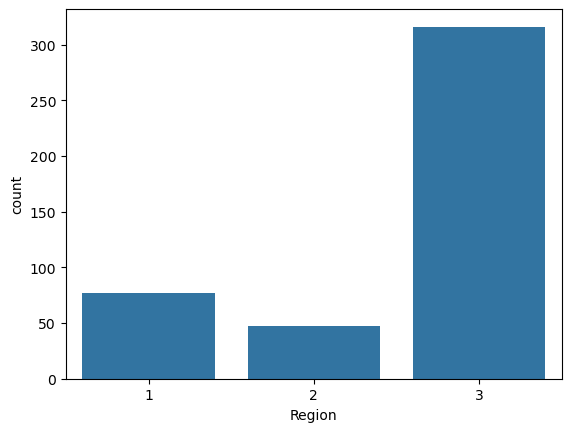

In [35]:
sns.countplot(x=df['Region'])
plt.show()

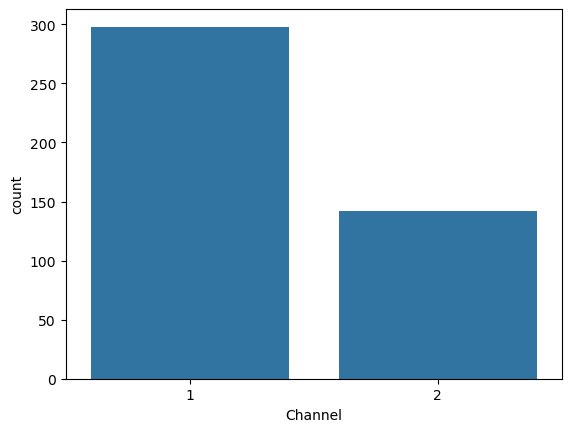

In [36]:
sns.countplot(x=df['Channel'])
plt.show()

In [37]:
import warnings 
warnings.filterwarnings('ignore')

<Axes: xlabel='Detergents_Paper', ylabel='Density'>

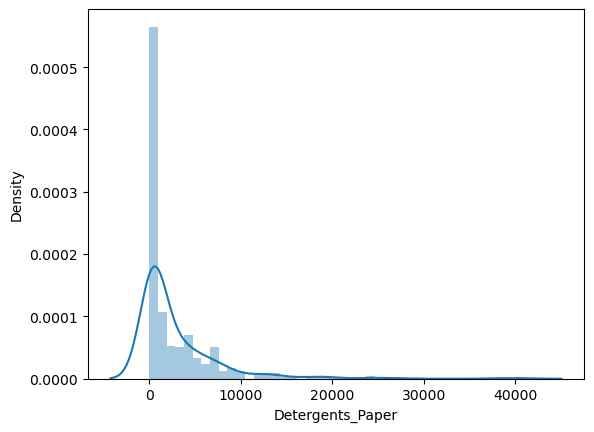

In [38]:
sns.distplot(df['Detergents_Paper'])

<Axes: xlabel='Delicassen', ylabel='Density'>

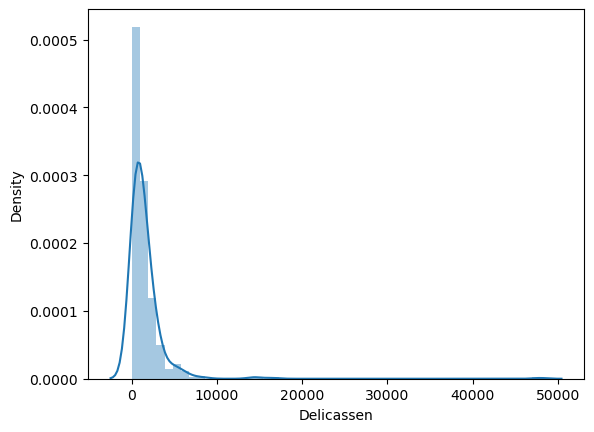

In [39]:
sns.distplot(df['Delicassen'])

<Axes: xlabel='Frozen', ylabel='Density'>

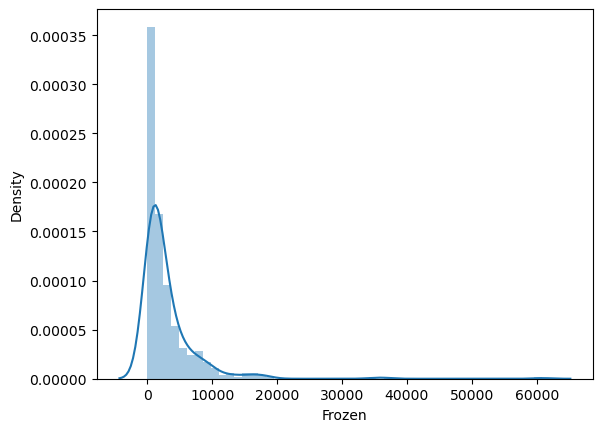

In [40]:
sns.distplot(df['Frozen'])

<Axes: xlabel='Grocery', ylabel='Density'>

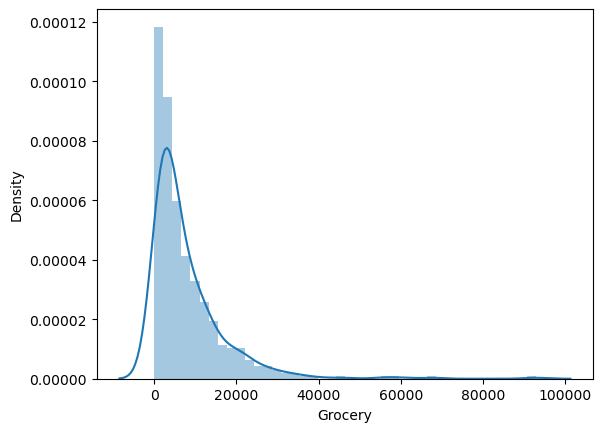

In [41]:
sns.distplot(df['Grocery'])

<Axes: xlabel='Fresh', ylabel='Density'>

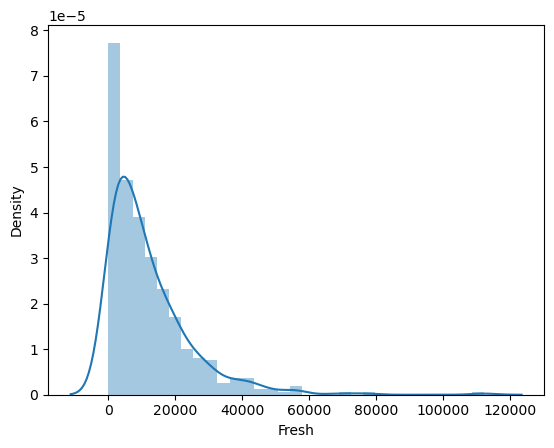

In [42]:
sns.distplot(df['Fresh'])

<Axes: xlabel='Channel', ylabel='Density'>

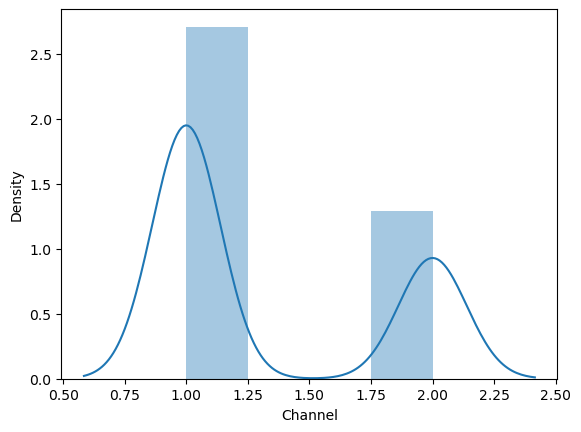

In [43]:
sns.distplot(df['Channel'])

<Axes: xlabel='Region', ylabel='Density'>

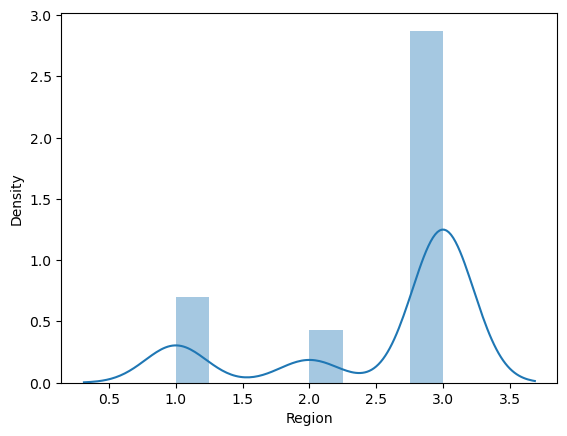

In [44]:
sns.distplot(df['Region'])

<Axes: ylabel='Region'>

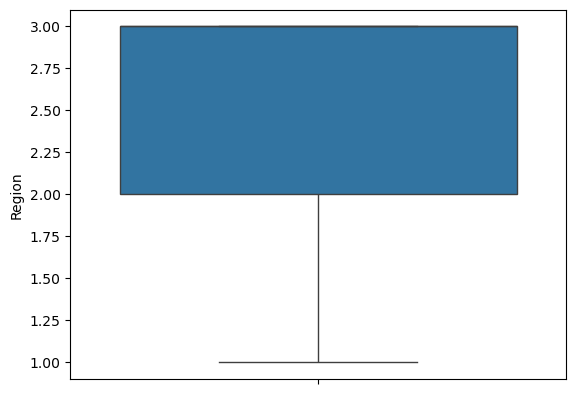

In [45]:
sns.boxplot(df['Region'])

<Axes: ylabel='Channel'>

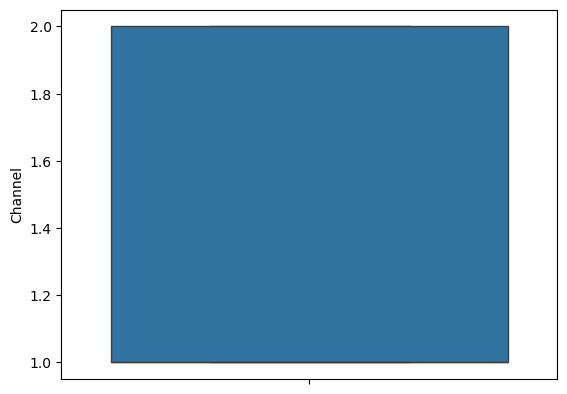

In [46]:
sns.boxplot(df['Channel'])

In [47]:
import statsmodels.formula.api as smf
model = smf.ols("Region~Channel",data = df).fit()

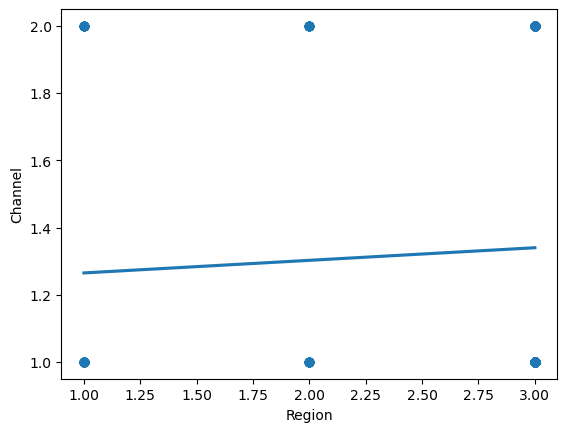

In [48]:
sns.regplot(x="Region",y="Channel",data=df,ci=None);

In [49]:
model.params

Intercept    2.407458
Channel      0.102609
dtype: float64

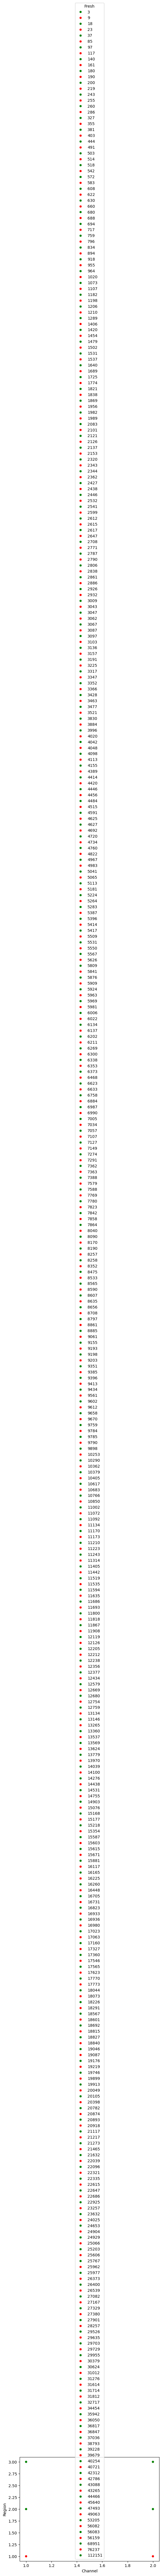

In [50]:
sns.scatterplot(x=df['Channel'],y=df['Region'],palette=['green','red'],hue=df['Fresh'])
plt.show()

In [51]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [81]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
x=stscaler.fit_transform(df)

In [83]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [85]:
import scipy.cluster.hierarchy as sch

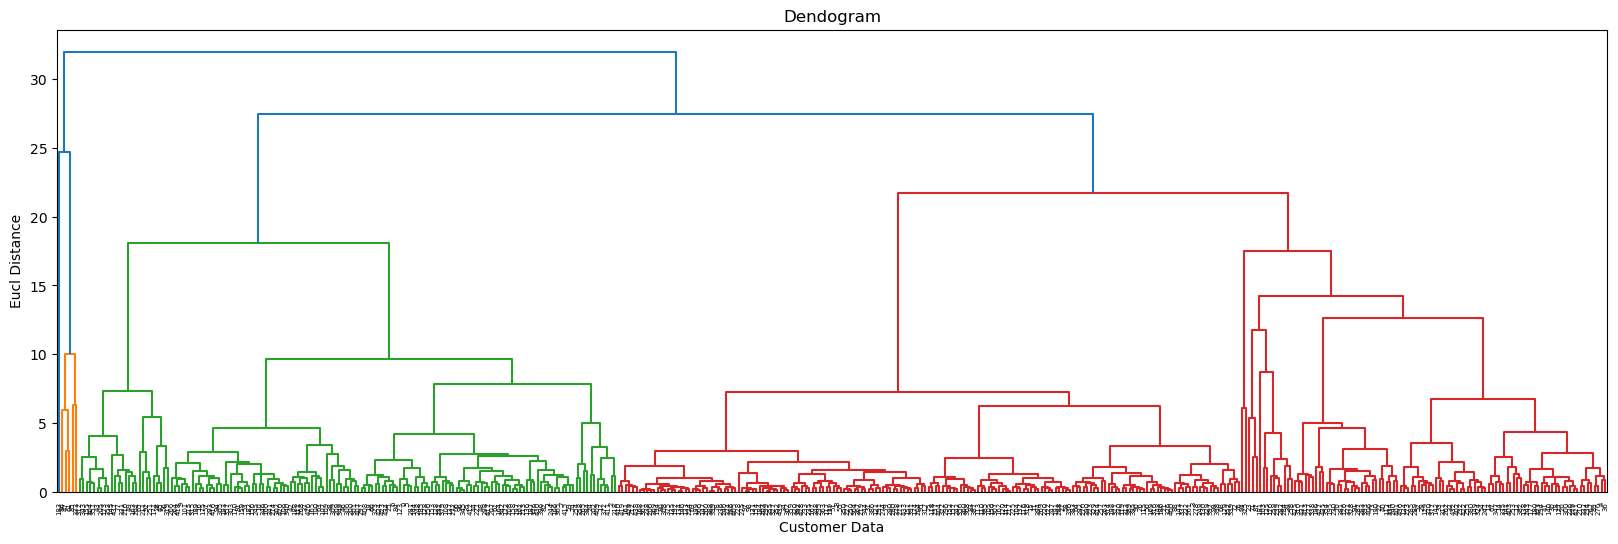

In [87]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer Data')
plt.ylabel('Eucl Distance')
plt.show()

In [91]:
len(set(dendo['color_list']))

4

In [105]:
from sklearn.cluster import AgglomerativeClustering 

In [111]:
model = AgglomerativeClustering(n_clusters=4)
cluster=model.fit_predict(x)


In [113]:
cluster

array([2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,

In [115]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [117]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,0
4,0
...,...
435,0
436,0
437,2
438,0


In [119]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,0


In [121]:
cust_group_data=pd.concat([df,group_num],axis=1)
cust_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,0


In [131]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster)

0.2670148241989557

In [133]:
cluster.shape

(440,)

In [135]:
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [141]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

In [143]:
wcss

[2266.9552665832452,
 1644.0598512347563,
 1326.674608213553,
 1070.2551995135616,
 989.3326418885057,
 856.7070228388117,
 791.8280762163156,
 710.1943394067517,
 668.2225054846901]

In [ ]:
SSS